## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
%tensorflow_version 2.x
import tensorflow as tf


In [0]:
import numpy as np
# random seed for reproducibility
np.random.seed(123)

In [0]:
from keras.datasets import fashion_mnist
#load data set
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [37]:
print('Number of training samples : ',x_train.shape[0])

Number of training samples :  60000


In [38]:
print('Number of test samples : ',x_test.shape[0])

Number of test samples :  10000


### Find dimensions of an image in the dataset

In [39]:
print('Size of the image :',x_train[0].shape)

Size of the image : (28, 28)


It is a gray scale image of size 28*28

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
#Load the library
from keras.utils import np_utils

In [0]:
#one hot encoding of test and train labels
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [42]:
# Check for coding of labels
print('Train label :',y_train[0])
print('Test Label :',y_test[0])

Train label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Test Label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Normalize both the train and test image data from 0-255 to 0-1

In [43]:
x_train=x_train.astype('float32')
x_train=x_train/255
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [44]:
x_test=x_test.astype('float32')
x_test=x_test/255
print(x_test)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [45]:
x_train[0].shape

(28, 28)

In [0]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [47]:
# check shape
x_train[0].shape

(28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Reshape,Conv2D,MaxPool2D
from tensorflow.keras import callbacks

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
#Initialize batchsize and epoch as varaibles
Batchsize=32
Epoch=10

In [0]:
# initialize the model
model1=Sequential()

In [0]:
# first conv layer with relu activation
model1.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model1.add(Activation('relu'))

In [0]:
# second conv layer iwth relu activation
model1.add(Conv2D(32,(3,3)))
model1.add(Activation('relu'))

In [0]:
# fully connected layer with relu activation
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))

In [0]:
# fulley connect out layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

In [0]:
# compile the model
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
# Store Training Results
early_stopping =callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [57]:
#model summary
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
activation_2 (Activation)    (None, 128)              

In [58]:
#Train the model
history=model1.fit(x_train,y_train,batch_size=Batchsize,epochs=Epoch,callbacks=callback_list,validation_data=(x_test,y_test),verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 225us/sample - loss: 0.3707 - accuracy: 0.8672 - val_loss: 0.2913 - val_accuracy: 0.8945
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2306 - accuracy: 0.9161 - val_loss: 0.2518 - val_accuracy: 0.9104
Epoch 3/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1674 - accuracy: 0.9377 - val_loss: 0.2555 - val_accuracy: 0.9096
Epoch 4/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1121 - accuracy: 0.9585 - val_loss: 0.2958 - val_accuracy: 0.9104
Epoch 5/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0761 - accuracy: 0.9718 - val_loss: 0.2912 - val_accuracy: 0.9156
Epoch 6/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0480 - accuracy: 0.9826 - val_loss: 0.3438 - val_accuracy: 0.9139
Epoch 7/10
60000/60000 [=========================

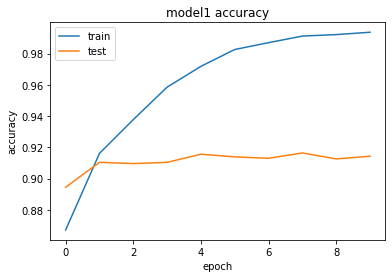

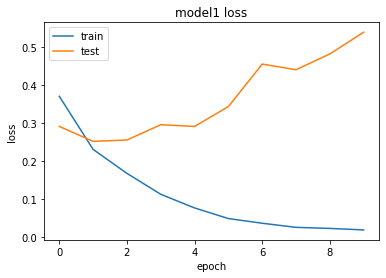

In [60]:
import matplotlib.pyplot as plt
 # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train accuracy : 0.99363333
Test accuracy : 0.9143


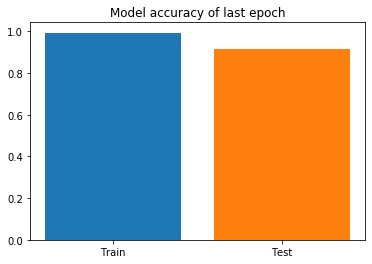

In [61]:
plt.title('Model accuracy of last epoch')
plt.bar('Train',history.history['accuracy'][-1])
plt.bar('Test',history.history['val_accuracy'][-1])
print ('Train accuracy :',history.history['accuracy'][-1])
print ('Test accuracy :',history.history['val_accuracy'][-1])

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
#Initialize batchsize and epoch as varaibles
Batchsize=32
Epoch=10

In [0]:
# initialize the model
model2=Sequential()

In [0]:
# conv layer 1
model2.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model2.add(Activation('relu'))

In [0]:
# conv layer 2
model2.add(Conv2D(32,(3,3)))
model2.add(Activation('relu'))

In [0]:
# maxpool layer
model2.add(MaxPool2D(pool_size=(2,2)))

In [0]:
# add drop out layer
model2.add(Dropout(0.25))

In [0]:
#fully connected layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

In [0]:
#output layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

In [0]:
# compile the model
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
#store training results
early_stopping =callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [72]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

Number of trainable parameter reduced due to max pooling

In [73]:
# train the model
history=model2.fit(x_train,y_train,batch_size=Batchsize,epochs=Epoch,callbacks=callback_list,validation_data=(x_test,y_test),verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3963 - accuracy: 0.8577 - val_loss: 0.3021 - val_accuracy: 0.8922
Epoch 2/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2640 - accuracy: 0.9027 - val_loss: 0.2653 - val_accuracy: 0.8999
Epoch 3/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2158 - accuracy: 0.9193 - val_loss: 0.2616 - val_accuracy: 0.9039
Epoch 4/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1831 - accuracy: 0.9313 - val_loss: 0.2363 - val_accuracy: 0.9133
Epoch 5/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.1574 - accuracy: 0.9411 - val_loss: 0.2266 - val_accuracy: 0.9200
Epoch 6/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1350 - accuracy: 0.9493 - val_loss: 0.2312 - val_accuracy: 0.9202
Epoch 7/10
60000/60000 [==========================

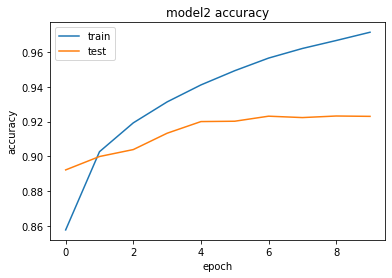

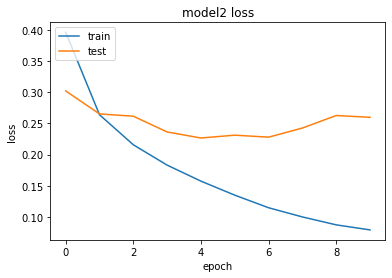

In [74]:
 # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train accuracy : 0.97138333
Test accuracy : 0.923


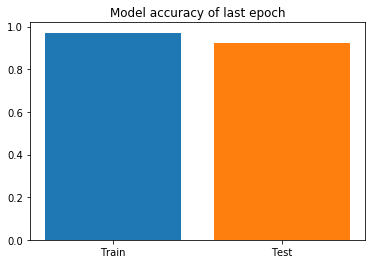

In [75]:
plt.title('Model accuracy of last epoch')
plt.bar('Train',history.history['accuracy'][-1])
plt.bar('Test',history.history['val_accuracy'][-1])
print ('Train accuracy :',history.history['accuracy'][-1])
print ('Test accuracy :',history.history['val_accuracy'][-1])

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

[]

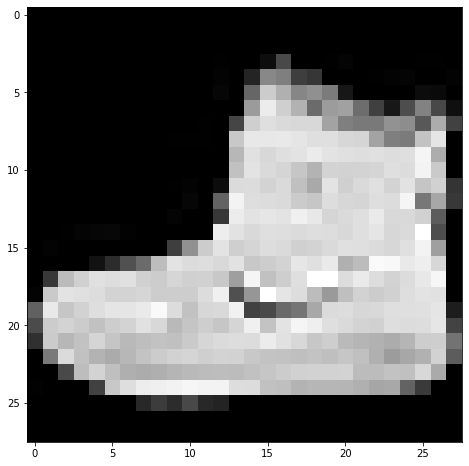

In [78]:
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.plot()

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

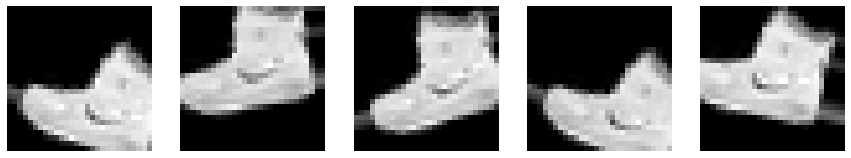

In [79]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [80]:
history=model2.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    steps_per_epoch=x_train.shape[0]/Batchsize,
                    epochs=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1875.0 steps, validate on 10000 samples
Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.9426 - accuracy: 0.6542 - val_loss: 0.4867 - val_accuracy: 0.8203
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6905 - accuracy: 0.7466 - val_loss: 0.4464 - val_accuracy: 0.8376
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6301 - accuracy: 0.7672 - val_loss: 0.4392 - val_accuracy: 0.8436
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5856 - accuracy: 0.7834 - val_loss: 0.4212 - val_accuracy: 0.8465
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5613 - accuracy: 0.7920 - val_loss: 0.4043 - val_accuracy: 0.8531
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5389 - accuracy: 0.8017 - val_loss: 0.3888 -

###  Report the final train and validation accuracy

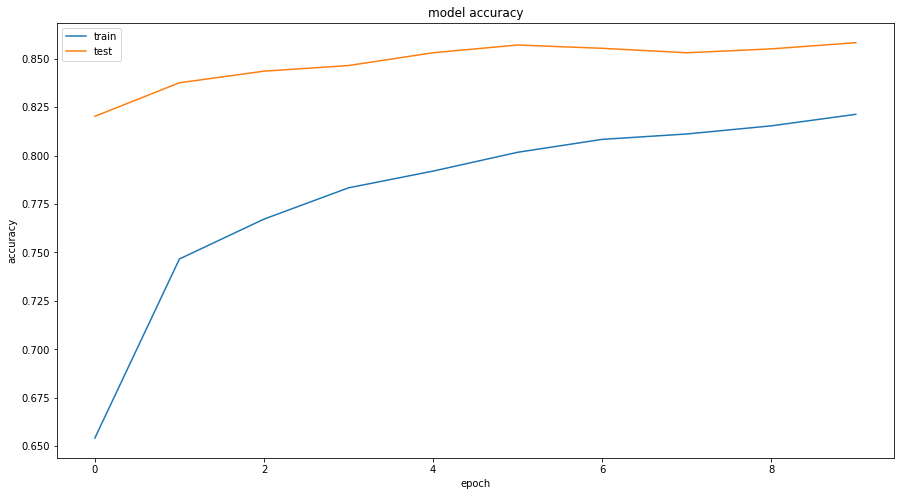

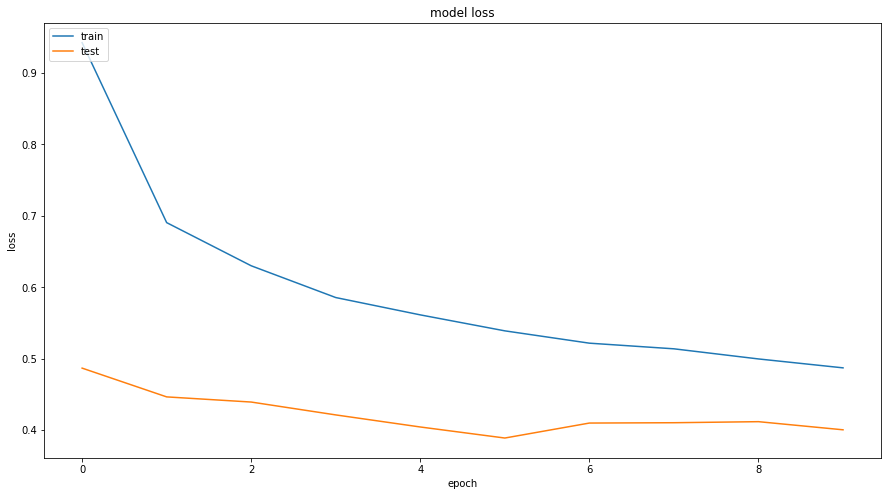

In [81]:
 # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train accuracy : 0.82131666
Test accuracy : 0.8583


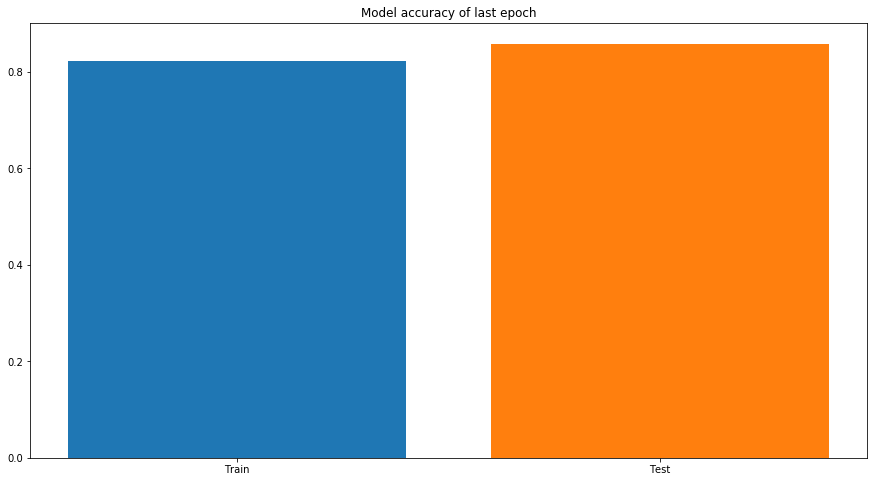

In [82]:
plt.title('Model accuracy of last epoch')
plt.bar('Train',history.history['accuracy'][-1])
plt.bar('Test',history.history['val_accuracy'][-1])
print ('Train accuracy :',history.history['accuracy'][-1])
print ('Test accuracy :',history.history['val_accuracy'][-1])

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 8)

### **Load CIFAR10 dataset**

In [84]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [85]:
print('Number of training images : ',x_train.shape[0])
print ('Number of testing images :',x_test.shape[0])
print ('Size of the image :',x_train[0].shape)

Number of training images :  50000
Number of testing images : 10000
Size of the image : (32, 32, 3)


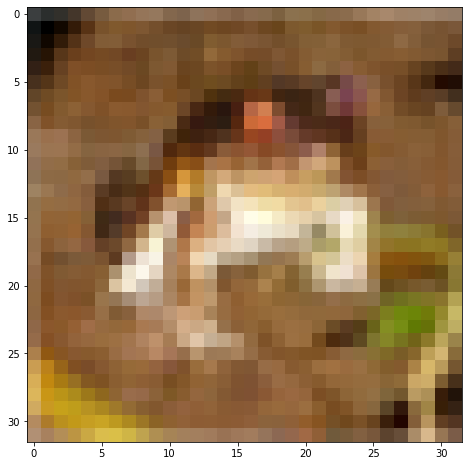

In [86]:
plt.figure(figsize=(8,8))
plt.imshow(x_train[0].squeeze())

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
def data_gen():
      # This will do preprocessing and realtime data augmentation:
      datagen = ImageDataGenerator(
      featurewise_center=False,  # set input mean to 0 over the dataset
      samplewise_center=False,  # set each sample mean to 0
      featurewise_std_normalization=False,  # divide inputs by std of the dataset
      samplewise_std_normalization=False,  # divide each input by its std
      zca_whitening=False,  # apply ZCA whitening
      rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
      width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
      height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
      horizontal_flip=True,  # randomly flip images
      vertical_flip=True)  # randomly flip images

      return datagen

### **Prepare/fit the generator.**

In [0]:
datagen=data_gen()
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

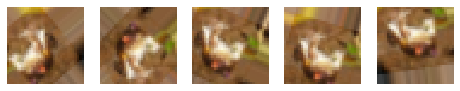

In [89]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype('uint8'), cmap=None)
    plt.plot()
plt.show()